In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

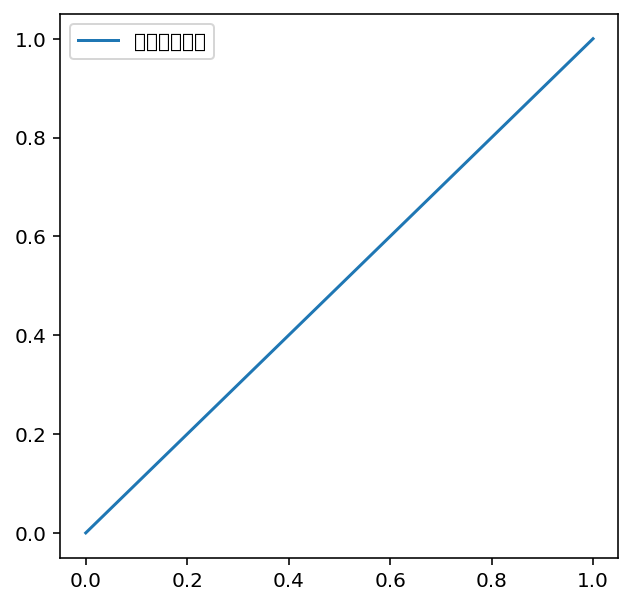

In [3]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [0]:
train = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/train.json', typ = 'frame')
val = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/val.json', typ = 'frame')
test = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/test.json', typ = 'frame')
song_meta = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/song_meta.json', typ = 'frame')
genre_gn_all = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/genre_gn_all.json', typ = 'series')

In [0]:
for data in [train,val,test]:
  data['년도'] = data['updt_date'].apply(lambda x: x[:4])  
  data['월'] = data['updt_date'].apply(lambda x: x[5:7])
  data['시간대'] = data['updt_date'].apply(lambda x:x[11:13])

# 아티스트 벡터 생성
- song_meta 데이터 활용

In [6]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


---
numpy 개념

- np.repeat(반복될 것들 리스트,반복 횟수 리스트)
- np.concatenate(list or arrays) : Numpy 배열들을 하나로 합치는데 이용

In [7]:
# ex) repeat
np.repeat(['a','b'],[2,3])

array(['a', 'a', 'b', 'b', 'b'], dtype='<U1')

In [8]:
# ex) concatenate
np.concatenate([[1],[2],[3],[4,5]])

array([1, 2, 3, 4, 5])

In [9]:
np.concatenate(([[1,2]],[[3,4]]),axis=0)

array([[1, 2],
       [3, 4]])

In [10]:
np.concatenate(([[1,2]],[[3,4]]),axis=1)

array([[1, 2, 3, 4]])

In [11]:
np.concatenate(([[1,2]],[[3,4]]),axis=None)

array([1, 2, 3, 4])

---

In [0]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_name_basket)))
artist_list=list(np.concatenate(song_meta['artist_name_basket'].values))

In [0]:
song_artist=pd.DataFrame({'song_id':song_id,'artist' : artist_list})

In [14]:
'''뭔 노래인지 모르겠지만 상당히 많은 가수들이 참여함.'''
song_artist[song_artist.song_id == 143370]

,song_id,artist
157981,143370,티파니 (TIFFANY)
157982,143370,김종국
157983,143370,다이나믹 듀오
157984,143370,여진구
157985,143370,김유정
157986,143370,에디킴
157987,143370,전현무
157988,143370,유인영
157989,143370,김수로
157990,143370,최다니엘


In [15]:
'''아티스트가 아예 존재하지 않는 경우도 있음.'''
song_artist[song_artist.artist =='']

,song_id,artist
228560,207607,
361100,328016,
770465,699788,


In [16]:
song_meta[song_meta.id ==  207607]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
207607,[GN1201],20160408,A`Typisk,2678216,[965703],Byger (Feat. Mass Ebdrup & Semih-Automatisk),[GN1200],"[A`Typisk, ]",207607


In [17]:
song_meta[song_meta.id ==  328016]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
328016,[GN2001],20180327,The Traditional Ballads Of Iceland 오로라 같은 매력의 ...,10150938,"[2112445, 2112446]",Consolation,[GN2000],"[Anna Palina, , Draupner]",328016


아티스트의 이름으로 다루면 어딘가 오류가 생기는 부분이 있는 것 같다. 아티스트 아이디로 백터를 구성하는 것이 좋을 것 같음.

In [0]:
song_meta['artist']=song_meta['artist_name_basket'].apply(lambda x: (',').join(x))
song_meta['artist']=song_meta['artist'].apply(lambda x: x.replace(', ',''))
song_meta['artist']=song_meta['artist'].apply(lambda x: x.replace(',,',','))
song_meta['artist']=song_meta['artist'].apply(lambda x: x.replace(' ',''))
song_meta['artist_list']=song_meta['artist'].apply(lambda x: x.split(','))

In [19]:
song_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,artist,artist_list
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0,VariousArtists,[VariousArtists]
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1,MurrayPerahia,[MurrayPerahia]
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2,PeterGabriel,[PeterGabriel]
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3,Matoma,[Matoma]
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4,JudeLaw,[JudeLaw]
...,...,...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984,FelaKuti,[FelaKuti]
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985,CyndiLauper,[CyndiLauper]
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986,윤종신,[윤종신]
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987,NaturePiano,[NaturePiano]


In [20]:
song_meta[song_meta.id ==  143370]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,artist,artist_list
143370,"[GN0105, GN0101]",20161222,"Hooxi, The Beginning",10025184,"[406421, 1692, 108358, 1284767, 18199, 601979,...",Talk About Love,[GN0100],"[티파니 (TIFFANY), 김종국, 다이나믹 듀오, 여진구, 김유정, 에디킴, 전...",143370,"티파니(TIFFANY),김종국,다이나믹듀오,여진구,김유정,에디킴,전현무,유인영,김수...","[티파니(TIFFANY), 김종국, 다이나믹듀오, 여진구, 김유정, 에디킴, 전현무..."


In [21]:
song_meta[song_meta.id ==  328016]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,artist,artist_list
328016,[GN2001],20180327,The Traditional Ballads Of Iceland 오로라 같은 매력의 ...,10150938,"[2112445, 2112446]",Consolation,[GN2000],"[Anna Palina, , Draupner]",328016,"AnnaPalina,Draupner","[AnnaPalina, Draupner]"


In [22]:
song_meta[song_meta['artist']=='AnnaPalina'].head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,artist,artist_list
54623,[GN1701],20180327,Mountain and Shore 감성을 흔드는 북유럽 보컬 재즈 (Iceland ...,10151359,[2112445],Song Of The Ocean,[GN1700],[Anna Palina ],54623,AnnaPalina,[AnnaPalina]
70175,[GN2001],20180327,My Lord and Old Ladies 나의 군주 그리고 나이든 여인 (북유럽 음...,10151318,[2112445],Lord,[GN2000],[Anna Palina ],70175,AnnaPalina,[AnnaPalina]
123748,[GN2001],20180327,My Lord and Old Ladies 나의 군주 그리고 나이든 여인 (북유럽 음...,10151318,[2112445],The Rose,[GN2000],[Anna Palina ],123748,AnnaPalina,[AnnaPalina]
164518,[GN1701],20180327,Mountain and Shore 감성을 흔드는 북유럽 보컬 재즈 (Iceland ...,10151359,[2112445],Autumn Leaves,[GN1700],[Anna Palina ],164518,AnnaPalina,[AnnaPalina]
236301,[GN1701],20180327,"Bluebird 일상이 영화가 되는 로맨틱 보컬 재즈 (북유럽 음악, 모던, 보사노...",10151326,[2112445],I´M Getting Sentimental Over You,[GN1700],[Anna Palina ],236301,AnnaPalina,[AnnaPalina]


노래 별 아티스트 프레임을 다시 만들어 보자.

In [0]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_list)))
artist_list=list(np.concatenate(song_meta['artist_list'].values))

song_artist=pd.DataFrame({'song_id':song_id,'artist' : artist_list})

In [24]:
song_artist[song_artist['artist']=='']

,song_id,artist
101093,91741,
111209,100944,
143732,130390,
228587,207607,
261195,237323,
267036,242621,
312232,283597,
373263,339036,
408174,370766,
742655,674536,


이상하게 이름을 받지 못하는 경우가 계속 발생하는데 어떤 이유인지 찾아보자.

In [25]:
for id in song_artist[song_artist['artist']==''].song_id:
  print(song_meta.loc[song_meta['id']==id,'artist'])

91741    uchuu,
Name: artist, dtype: object
100944    Route,
Name: artist, dtype: object
130390    uchuu,
Name: artist, dtype: object
207607    A`Typisk,
Name: artist, dtype: object
237323    uchuu,
Name: artist, dtype: object
242621    uchuu,
Name: artist, dtype: object
283597    uchuu,
Name: artist, dtype: object
339036    uchuu,
Name: artist, dtype: object
370766    ThiloWolfBigBand&Trio,
Name: artist, dtype: object
674536    uchuu,
Name: artist, dtype: object
699788    HenriLanz,SkinnyWilliams,WILLIAMRAPPAPORT,
Name: artist, dtype: object


보이는 경우처럼 맨뒤(인덱싱[-1])부분이 ','로 되어 있는 경우에 이러한 상황이 발생하는 것으로 보인다.

In [0]:
song_meta['artist'] = song_meta['artist'].apply(lambda x:x.rstrip(','))

In [27]:
for id in song_artist[song_artist['artist']==''].song_id:
  print(song_meta.loc[song_meta['id']==id,'artist'])

91741    uchuu
Name: artist, dtype: object
100944    Route
Name: artist, dtype: object
130390    uchuu
Name: artist, dtype: object
207607    A`Typisk
Name: artist, dtype: object
237323    uchuu
Name: artist, dtype: object
242621    uchuu
Name: artist, dtype: object
283597    uchuu
Name: artist, dtype: object
339036    uchuu
Name: artist, dtype: object
370766    ThiloWolfBigBand&Trio
Name: artist, dtype: object
674536    uchuu
Name: artist, dtype: object
699788    HenriLanz,SkinnyWilliams,WILLIAMRAPPAPORT
Name: artist, dtype: object


정상적으로 삭제된 것을 확인할 수 있다.

In [0]:
# artist 컬럼에 다시 적용
song_meta['artist_list']=song_meta['artist'].apply(lambda x: x.split(','))

In [40]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_list)))
artist_list=list(np.concatenate(song_meta['artist_list'].values))

song_artist=pd.DataFrame({'song_id':song_id,'artist' : artist_list})

# song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_id_basket)))
# artist_list=list(np.concatenate(song_meta['artist_id_basket'].values))
# song_artist['artist_id'] = artist_list

ValueError: ignored

In [36]:
song_artist[song_artist['artist']=='']

,song_id,artist


In [37]:
song_artist['artist'].value_counts()

VariousArtists              23206
태교마을                         1588
BerlinerPhilharmoniker       1135
HerbertVonKarajan             984
WienerPhilharmoniker          821
                            ...  
PhilSilvers                     1
Architt                         1
ArethaHenry-Jones               1
VILLAS                          1
TallTalesTheSilverLining        1
Name: artist, Length: 111145, dtype: int64

VariousArtists에 대해 어떻게 처리해야할지 고민을 해봐야겠음

In [38]:
song_artist

,song_id,artist
0,0,VariousArtists
1,1,MurrayPerahia
2,2,PeterGabriel
3,3,Matoma
4,4,JudeLaw
...,...,...
779524,707984,FelaKuti
779525,707985,CyndiLauper
779526,707986,윤종신
779527,707987,NaturePiano


In [39]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,artist,artist_list
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0,VariousArtists,[VariousArtists]
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1,MurrayPerahia,[MurrayPerahia]
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2,PeterGabriel,[PeterGabriel]
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3,Matoma,[Matoma]
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4,JudeLaw,[JudeLaw]


In [0]:
song_meta['artist']=song_meta['artist_name_basket'].apply(lambda x: (',').join(x))
song_meta['artist']=song_meta['artist'].apply(lambda x: x.replace(', ',''))
song_meta['artist']=song_meta['artist'].apply(lambda x: x.replace(',,',','))
song_meta['artist']=song_meta['artist'].apply(lambda x: x.replace(' ',''))
song_meta['artist_list']=song_meta['artist'].apply(lambda x: x.split(','))
song_meta['artist'] = song_meta['artist'].apply(lambda x:x.rstrip(','))

In [54]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,artist,artist_list
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0,VariousArtists,[VariousArtists]
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1,MurrayPerahia,[MurrayPerahia]
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2,PeterGabriel,[PeterGabriel]
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3,Matoma,[Matoma]
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4,JudeLaw,[JudeLaw]


In [0]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_list)))
artist_list=list(np.concatenate(song_meta['artist_list'].values))

song_artist=pd.DataFrame({'song_id':song_id,'artist' : artist_list})

In [57]:
song_artist

,song_id,artist
0,0,VariousArtists
1,1,MurrayPerahia
2,2,PeterGabriel
3,3,Matoma
4,4,JudeLaw
...,...,...
779535,707984,FelaKuti
779536,707985,CyndiLauper
779537,707986,윤종신
779538,707987,NaturePiano


In [69]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_id_basket)))
artist_list=list(np.concatenate(song_meta['artist_id_basket'].values))
#song_artist['artist_id'] = artist_list

len(artist_list)

779462

보는 것 처럼 아티스트 이름과 아티스트 id의 개수가 맞지 않는 경우가 있다. 이것을 처리해줘야할 듯.

In [0]:
song_meta['id_count']=song_meta['artist_id_basket'].apply(lambda x: len(x))
song_meta['name_count']=song_meta['artist_name_basket'].apply(lambda x: len(x))

In [77]:
song_meta[song_meta['id_count'] != song_meta['name_count']]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,artist,artist_list,id_count,name_count
6238,[GN0901],20010403,Liberty City Fla.,45928,[56936],I Met Her In Miami,[GN0900],"[Liberty, City]",6238,"Liberty,City","[Liberty, City]",1,2
15100,[GN0901],20071214,아름다운 드라이브 Cinema & Musical,362455,[232053],Think Of Me,[GN0900],"[Los, Dioses]",15100,"Los,Dioses","[Los, Dioses]",1,2
64162,"[GN1601, GN1602, GN1613]",20180216,50 Violin Masterworks,4442865,"[174433, 1543263, 1459364, 2240313]","Richter: Recomposed By Max Richter: Vivaldi, T...",[GN1600],"[Daniel Hope, Christian Badzura, Jane Berthe, ...",64162,"DanielHope,ChristianBadzura,JaneBerthe,Z&#252;...","[DanielHope, ChristianBadzura, JaneBerthe, Z&#...",4,5
72352,[GN0901],20071214,아름다운 드라이브 Cinema & Musical,362455,[232053],The Promise,[GN0900],"[Los, Dioses]",72352,"Los,Dioses","[Los, Dioses]",1,2
76782,"[GN1503, GN1501]",20070328,아주 특별한 영화음악,348791,[232053],Merry Christmas Mr.Lawrence,[GN1500],"[Los, Dioses]",76782,"Los,Dioses","[Los, Dioses]",1,2
76944,"[GN1304, GN1301, GN1302]",20070327,Interpretations: Celebrating The Music Of Eart...,366362,[236266],Can`t Hide Love,[GN1300],"[The Randy Watson Experience &, Bilal]",76944,"TheRandyWatsonExperience&,Bilal","[TheRandyWatsonExperience&, Bilal]",1,2
122311,[GN0901],20010403,Liberty City Fla.,45928,[56936],Dirty Shame,[GN0900],"[Liberty, City]",122311,"Liberty,City","[Liberty, City]",1,2
207607,[GN1201],20160408,A`Typisk,2678216,[965703],Byger (Feat. Mass Ebdrup & Semih-Automatisk),[GN1200],"[A`Typisk, ]",207607,A`Typisk,"[A`Typisk, ]",1,2
222961,[GN1501],20150722,불후의 명곡 - 뮤지컬 명예의 전당,2330769,[232053],I Know Him So Well (체스),[GN1500],"[Los, Dioses]",222961,"Los,Dioses","[Los, Dioses]",1,2
271176,[GN0901],20071214,아름다운 드라이브 Cinema & Musical,362455,[232053],Conquest Of Paradise,[GN0900],"[Los, Dioses]",271176,"Los,Dioses","[Los, Dioses]",1,2


패턴이 없기때문에 일일히 지정해줘야할 것으로 보인다.

1. Case count(artist_id): 1, but count(artist_name): 2

In [0]:
song_meta.loc[(song_meta['id_count']==1)&(song_meta['name_count']==2),'artist'] =\
song_meta.loc[(song_meta['id_count']==1)&(song_meta['name_count']==2),'artist'].apply(lambda x: x.replace(',',''))

2. Case count(artist_id): 2, but count(artist_name): 3
- 전에 만든 코드로 잘 분리되어 있음

In [93]:
song_meta.loc[(song_meta['id_count']==2)&(song_meta['name_count']==3),'artist']

328016    AnnaPalina,Draupner
Name: artist, dtype: object

3. Case count(artist_id): 3, but count(artist_name): 4
- 전에 만든 코드로 잘 분리되어 있음

In [94]:
song_meta.loc[(song_meta['id_count']==3)&(song_meta['name_count']==4),'artist']

699788    HenriLanz,SkinnyWilliams,WILLIAMRAPPAPORT
Name: artist, dtype: object

4. Case count(artist_id): 4, but count(artist_name): 5

In [0]:
song_meta.loc[(song_meta['id_count']==4)&(song_meta['name_count']==5),'artist']=\
song_meta.loc[(song_meta['id_count']==4)&(song_meta['name_count']==5),'artist'].values[0].replace(',Z&#252;rcher','')

---

In [0]:
song_meta['artist_list']=song_meta['artist'].apply(lambda x: x.split(','))

In [0]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_list)))
artist_list=list(np.concatenate(song_meta['artist_list'].values))

song_artist=pd.DataFrame({'song_id':song_id,'artist' : artist_list})

In [104]:
song_artist

,song_id,artist
0,0,VariousArtists
1,1,MurrayPerahia
2,2,PeterGabriel
3,3,Matoma
4,4,JudeLaw
...,...,...
779504,707984,FelaKuti
779505,707985,CyndiLauper
779506,707986,윤종신
779507,707987,NaturePiano


In [105]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_id_basket)))
artist_list=list(np.concatenate(song_meta['artist_id_basket'].values))
#song_artist['artist_id'] = artist_list

len(artist_list)

779462

아직도 개수가 맞지 않는다.. 뭐가 문제일까?

In [0]:
#song_meta['id_count']=song_meta['artist_id_basket'].apply(lambda x: len(x))
song_meta['revised_name_count']=song_meta['artist_list'].apply(lambda x: len(x))

In [110]:
song_meta[song_meta['revised_name_count'] != song_meta['id_count']]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,artist,artist_list,id_count,name_count,revised_name_count
7751,"[GN1104, GN1103, GN1101]",20180424,My Name (Mahalo Remix) (Feat. BISHOP),10160386,"[2087467, 1702836]",My Name (Mahalo Remix) (Feat. BISHOP),[GN1100],"[Maxim Schunk, Raven & Kreyn]",7751,MaximSchunkRaven&Kreyn,[MaximSchunkRaven&Kreyn],2,2,1
15463,"[GN1608, GN1601]",20160920,New York Rhapsody,2711587,"[346065, 769512, 30679]",Tonight,[GN1600],"[Lang Lang, Sean Jones, Leonard Bernstein]",15463,"LangLang,SeanJonesLeonardBernstein","[LangLang, SeanJonesLeonardBernstein]",3,3,2
19574,"[GN1104, GN1103, GN1101]",20140508,Spinnin` Records Talent Pool EP 4,2261135,"[768239, 775523]",What We Need Tonight (Feat. Roman Polonsky) (O...,[GN1100],"[Igor Garnier, Roman Polonsky]",19574,IgorGarnierRomanPolonsky,[IgorGarnierRomanPolonsky],2,2,1
25055,"[GN0801, GN0803]",19940918,박인희/이연실 힛트앨범,357456,[228971],비개인 오후,[GN0800],"[박인희,이연실]",25055,"박인희,이연실","[박인희, 이연실]",1,1,2
26744,"[GN1601, GN1602]",20171006,Villa-Lobos: Little Train of the Caipira (from...,4052907,[2004641],"Bachianas Brasileiras No. 2, W247: 4. Toccata ...",[GN1600],"[London Symphony Orchestra,amp; Sir Eugene Goo...",26744,"LondonSymphonyOrchestra,amp;SirEugeneGoossens","[LondonSymphonyOrchestra, amp;SirEugeneGoossens]",1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678335,"[GN1601, GN1602, GN1614, GN1613]",20120727,Summer Holiday Classics,2138928,"[405060, 43462, 106167]",Vaughan-Williams : The Lark Ascending (본-윌리엄스 ...,[GN1600],"[David Greed, David Lloyd-Jones, English Nort...",678335,"DavidGreedDavidLloyd-Jones,EnglishNorthernPhil...","[DavidGreedDavidLloyd-Jones, EnglishNorthernPh...",3,3,2
685715,"[GN1503, GN1501]",20161028,Love & Friendship (Original Motion Picture Sou...,10010459,"[232743, 5850, 1222229]",Idomeneo : March,[GN1500],"[Mark Suozzo, Wolfgang Amadeus Mozart, Irish ...",685715,"MarkSuozzo,WolfgangAmadeusMozartIrishFilmOrche...","[MarkSuozzo, WolfgangAmadeusMozartIrishFilmOrc...",3,3,2
689454,"[GN1601, GN1602, GN1613]",20081008,베토벤 바이러스 : The Classics Vol.1,398668,[261548],Piazzola : Libertango (피아졸라 : 리베르탱고),[GN1600],[Orchestra Dell`Accademia Nazionale Di Santa C...,689454,OrchestraDell`AccademiaNazionaleDiSantaCecilli...,[OrchestraDell`AccademiaNazionaleDiSantaCecill...,1,1,2
695773,"[GN1104, GN1103, GN1102, GN1101]",20160617,Freak Like Me (Feat. Katy B) (Radio Edit),2690227,"[743721, 854436]",Freak Like Me (Feat. Katy B) (Radio Edit),[GN1100],"[Lee Walker, DJ Deeon]",695773,LeeWalkerDJDeeon,[LeeWalkerDJDeeon],2,2,1


수정을 하면서 문제가 생기는 것 같다. 처음부터 len으로 비교를 한 뒤에 접근하는 방식이 좋을 것 같음.. 하